In [13]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Import the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance.shape

(1338, 7)

In [16]:
# One hot encode our dataset
insurance_one_hot_encode = pd.get_dummies(insurance)
insurance_one_hot_encode.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
# Let's create features and labels
X = insurance_one_hot_encode.drop("charges", axis= 1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [18]:
y = insurance_one_hot_encode["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [19]:
# Let's Split our dataset into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(y_train)

1070

In [21]:
insurance_one_hot_encode.shape

(1338, 12)

In [22]:
1338*0.8

1070.4

## Let's try to improve our model

In [40]:
# Let's build a model with 3 layers, 200 epochs and Adam optimizer with learning rate = 0.01

# set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 11699.1221 - mae: 11699.1221
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7486.5830 - mae: 7486.5830
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7280.0952 - mae: 7280.0952
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7057.4839 - mae: 7057.4839
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6840.1211 - mae: 6840.1211
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6597.5317 - mae: 6597.5317
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6478.4839 - mae: 6478.4839
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6286.7329 - mae: 6286.7329
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6168.7163 - mae: 6168.7163
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6002.4312 - mae: 6002.43

In [41]:
# Let's Evaluate our model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3174.0725 - mae: 3174.0725


[3174.072509765625, 3174.072509765625]

In [42]:
# Let's try to plot the loss
model_history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 3520.8020 - mae: 3520.8020
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 3506.6035 - mae: 3506.6035
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 3506.3704 - mae: 3506.3704
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3500.4614 - mae: 3500.4614
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3509.5610 - mae: 3509.5610
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3578.7256 - mae: 3578.7256
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3501.2666 - mae: 3501.2666
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3539.4463 - mae: 3539.4463
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3521.6724 - mae: 3521.6724
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3633.3145 - mae: 3633.3145

Text(0, 0.5, 'loss')

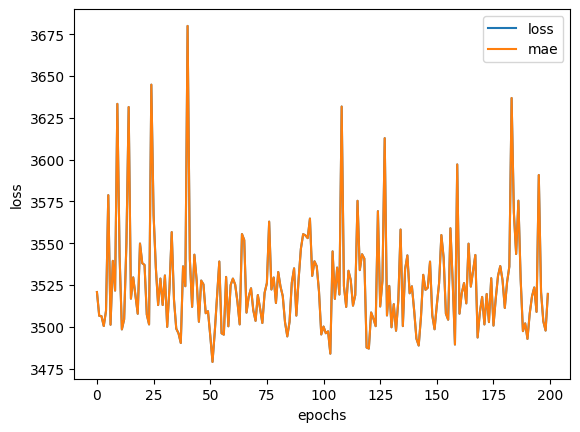

In [44]:
pd.DataFrame(model_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

## How long should you train your model?

Ans: It really depends on the problem you're working on. However, many people have asked this question before... so Tensorflow has a solution! It's called the **Early Stopping Callback**, which is a TensorFlow Component you can add to your model to stop training once it stops improving a certain metric.